# Importing Libraries & Data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

#disabling deprication warnings
warnings.filterwarnings('ignore')

#Choosing styling option for how plots will appear
plt.style.use('fivethirtyeight')

In [2]:
#importing data
df = pd.read_csv(os.path.join(r'C:\Users\iNDIA\Desktop\Career Foundry\6 Advanced Analytics & Dashboard Design\6.1 Sourcing Open Data\World Happiness Report\WHR.csv'))

In [3]:
df.shape

(2128, 12)

In [4]:
df.head()

,Unnamed: 0,Country name,Country Code,Regional Indicator,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,0,Afghanistan,AFG,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,1,Afghanistan,AFG,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,2,Afghanistan,AFG,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,3,Afghanistan,AFG,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,4,Afghanistan,AFG,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


# 2. Data Wrangling

In [5]:
# Dropping Column Unnamed: 0
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [6]:
df.columns

Index(['Country name', 'Country Code', 'Regional Indicator', 'year',
       'Happiness Score', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption'],
      dtype='object')

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.head()

,Country name,Country Code,Regional Indicator,year,Happiness Score,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,AFG,South Asia,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882
1,Afghanistan,AFG,South Asia,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850
2,Afghanistan,AFG,South Asia,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707
3,Afghanistan,AFG,South Asia,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731
4,Afghanistan,AFG,South Asia,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776


#### Yearly Happiness score for 2007-2022 (15 Years)

In [9]:
# Creating a new dataframe with median Happiness Score grouped by years

data = df.groupby('year').agg({'Happiness Score': ['median']})

In [10]:
data.dtypes

Happiness Score  median    float64
dtype: object

In [11]:
data.index

Int64Index([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
            2018, 2019, 2020, 2021, 2022],
           dtype='int64', name='year')

In [12]:
# Checking headers

data.head(20)

,Happiness Score
,median
year,
2007,5.2215
2008,5.1815
2009,5.3605
2010,5.4605
2011,5.2240
2012,5.3365
2013,5.2460
2014,5.3330


In [13]:
data_2 = data.reset_index()

In [14]:
data_2.head(20)

,year,Happiness Score
,,median
0,2007,5.2215
1,2008,5.1815
2,2009,5.3605
3,2010,5.4605
4,2011,5.2240
5,2012,5.3365
6,2013,5.2460
7,2014,5.3330
8,2015,5.3440


In [15]:
# Setting date as the index

from datetime import datetime

data_2['datetime'] = pd.to_datetime(data_2['year'], format = '%Y')
data_2 = data_2.set_index('datetime')
data_2.drop(['year'], axis = 1, inplace = True)
data_2.head()

,Happiness Score
,median
datetime,
2007-01-01,5.2215
2008-01-01,5.1815
2009-01-01,5.3605
2010-01-01,5.4605
2011-01-01,5.2240


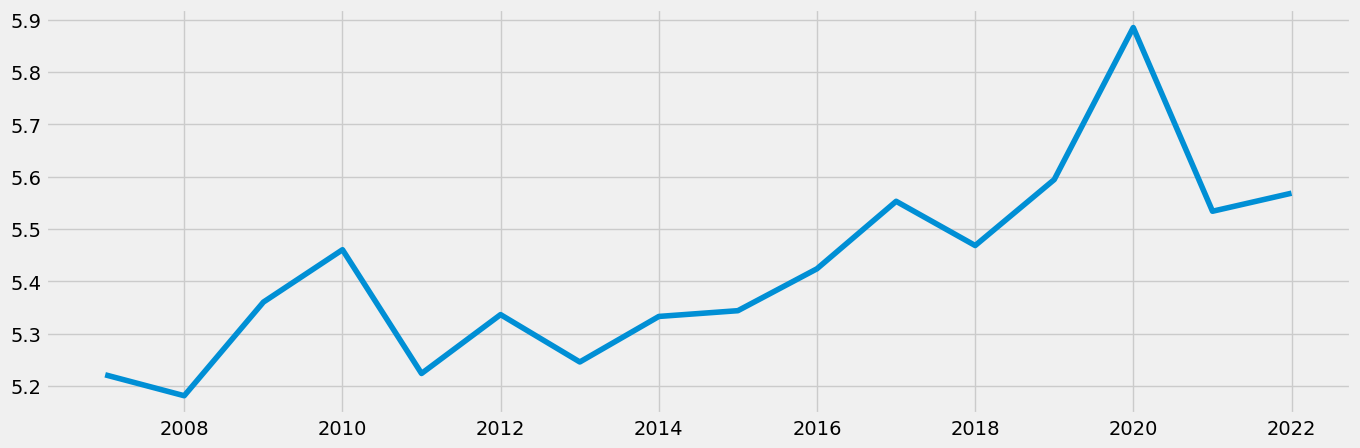

In [16]:
# Plotting the data using matplotlib pyplot

plt.figure(figsize= (15,5), dpi = 100)
plt.plot(data_2)

In [17]:
# Checking for missing value

data_2.isnull().sum()

Happiness Score  median    0
dtype: int64

# 3. Time Series Data - Decomposing

In [18]:
# Decomposing time series
decomposition = sm.tsa.seasonal_decompose(data_2, model = 'additive')

In [19]:
from pylab import rcParams

rcParams['figure.figsize'] = 18,7

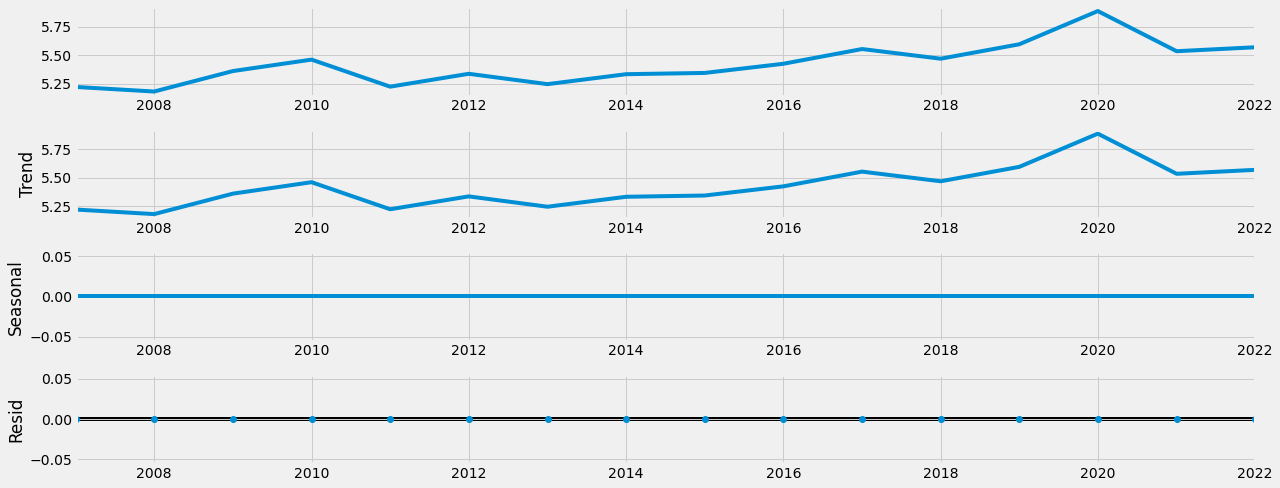

In [20]:
# Plot the separate components

decomposition.plot()
plt.show()

# 4. Stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller(timeseries):
    print('Dickey-Fuller stationarity test:')
    test = adfuller(timeseries, autolag = 'AIC')
    result = pd.Series(test[0:4], index =['Test Statistic', 'p-value', 'Number of Lages used', 'Number of observations used'])
    for key, value in test[4].items():
        result['Critical value(%s)' %key] = value
    print(result)
        
    # Apply test using function on time series
dickey_fuller(data_2['Happiness Score'])

Dickey-Fuller stationarity test:
Test Statistic                 3.739682
p-value                        1.000000
Number of Lages used           6.000000
Number of observations used    9.000000
Critical value(1%)            -4.473135
Critical value(5%)            -3.289881
Critical value(10%)           -2.772382
dtype: float64


The p-value is more than 0.05, also Test Statistic value is much higher than the Crtitical Value. Thus we cannot reject the null hypothesis and we can say that the chart is not stationary!

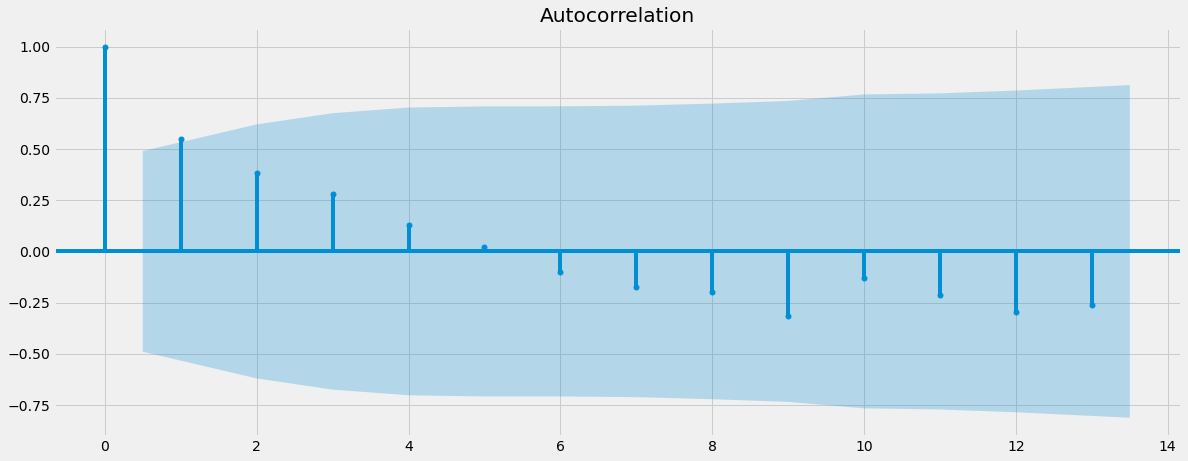

In [22]:
# Check out a plot for autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data_2)
plt.show()

The test above shows the vertical lines going above the blue edge are limited, indicating that the lags are significantly correlated with each other and shows strong stationary thus contradicting the Dickey-Fuller test. Although, we will still be going forward with Stationarizing this Data

# 5. Stationarizing Data

#### Differencing

In [23]:
data_diff = data_2 - data_2.shift(1)

In [24]:
data_diff.dropna(inplace = True)

#removing missing value

In [25]:
data_diff.head(20)

,Happiness Score
,median
datetime,
2008-01-01,-0.0400
2009-01-01,0.1790
2010-01-01,0.1000
2011-01-01,-0.2365
2012-01-01,0.1125
2013-01-01,-0.0905
2014-01-01,0.0870
2015-01-01,0.0110


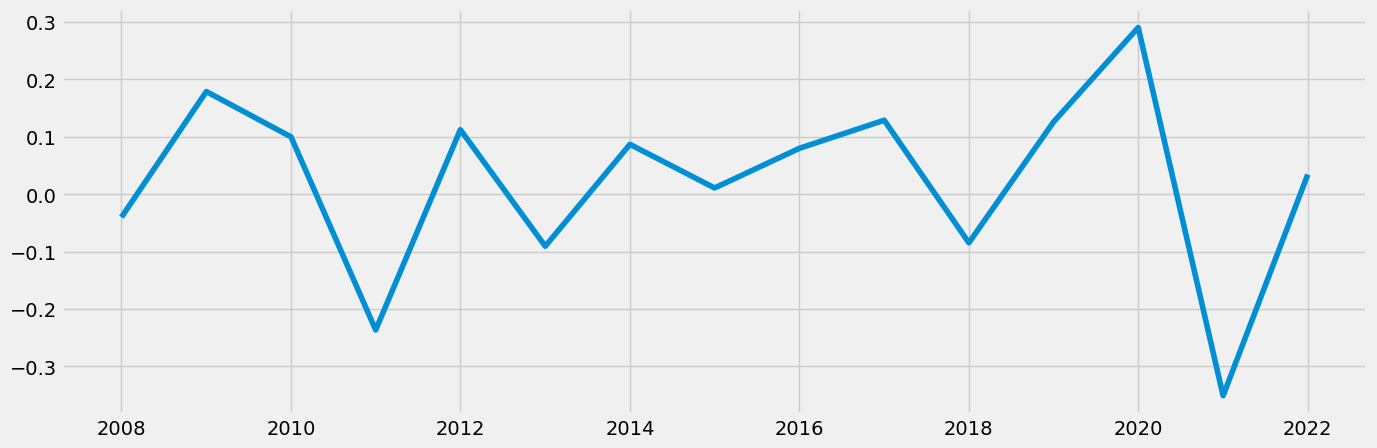

In [26]:
# Checking differencing time-series curve

plt.figure(figsize=(15,5), dpi = 100)
plt.plot(data_diff)

In [27]:
# Re-running Dickey-Fuller Test
dickey_fuller(data_diff)

Dickey-Fuller stationarity test:
Test Statistic                -21.830516
p-value                         0.000000
Number of Lages used            5.000000
Number of observations used     9.000000
Critical value(1%)             -4.473135
Critical value(5%)             -3.289881
Critical value(10%)            -2.772382
dtype: float64


The result shows Data to be stationarity as - p-value less than 0.05, critical value is higher than Test Statistics. Therefore Null-hypothesis can be rejected

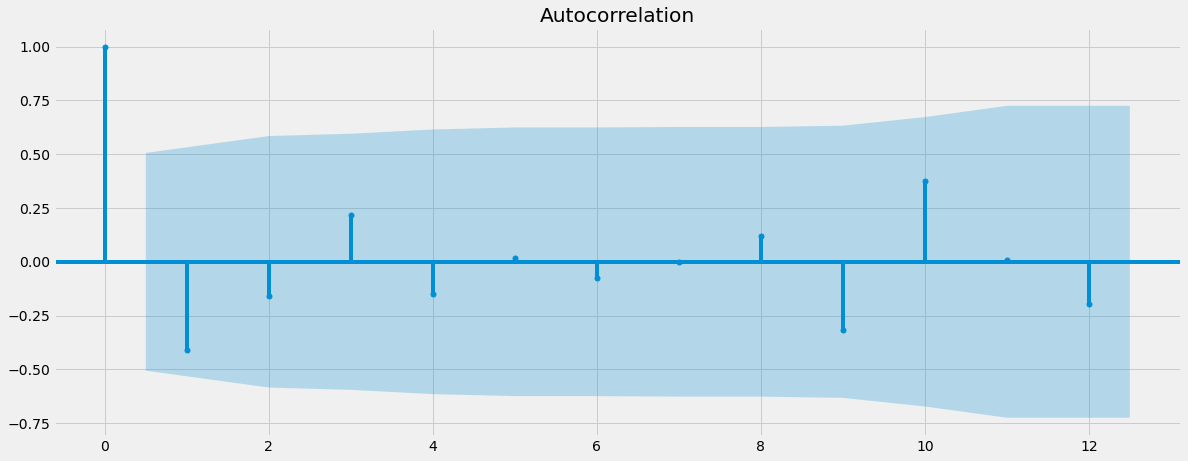

In [28]:
# Plotting autocorrelations again

plot_acf(data_diff)
plt.show()

The autocorrelation plot has slightly improved and shows strong correlation